# Lab work #1
# Kseniia Popova
# Group No Ks31

# List of source datasets
1. [Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset)
2. [Diabetes Dataset](https://www.kaggle.com/datasets/asinow/diabetes-dataset)
3. [U.S Post College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)
4. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
5. [Arrest Data in Los Angeles](https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles)
6. [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)
7. [Digital Literacy Education Dataset](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
8. [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)
9. [College Basketball Dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset)
10. [Pulsar Dataset HTRU2](https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2)
11. [Travel Review Rating Dataset](https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset)
12. [School Attendance by District 2021-2022](https://www.kaggle.com/datasets/usmanlovescode/school-attendance-b-district-2021-2022)

## Task 1: Data Cleaning and Preparation
**Objective:** Clean and prepare a dataset for analysis.

**Instructions:**
1. Load a dataset of your choice (from proposed Datasets).
2. Handle missing values by either removing them or imputing with appropriate values.
3. Remove any duplicate rows.
4. Convert categorical variables into numerical format using techniques like one-hot encoding (but be aware of sparse and non-sparse one-hot encoding).
5. Normalize or standardize numerical features.
6. Save the cleaned dataset to a new CSV file.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

file_path = "C:\\Users\\Irina\\Documents\\Uni\\Ksu\\Universitat\\3kurs\\2_semestr\\omn\\winequality-red.csv"
df = pd.read_csv(file_path)
print("Оригінальний датасет (перші 5 рядків):")
print(df.head())

df.fillna(df.median(), inplace=True) 
print("\nДатасет після заповнення пропущених значень (перші 5 рядків):")
print(df.head())

df.drop_duplicates(inplace=True)
print("\nДатасет після видалення дублікатів (перші 5 рядків):")
print(df.head())

categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("\nДатасет після перетворення категоріальних змінних (перші 5 рядків):")
    print(df.head())

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nДатасет після нормалізації числових ознак (перші 5 рядків):")
print(df.head())

print("\nІнформація про фінальний датасет:")
print(df.info())

print("\nСтатистика по числових даних:")
print(df.describe())

cleaned_file_path = "C:\\Users\\Irina\\Documents\\Uni\\Ksu\\Universitat\\3kurs\\2_semestr\\omn\\cleaned_winequality-red.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"\nОчищений датасет збережено: {cleaned_file_path}")

Оригінальний датасет (перші 5 рядків):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1  

## Task 2: Exploratory Data Analysis (EDA)
**Objective:** Perform exploratory data analysis to understand the dataset.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Calculate basic statistics (mean, median, mode, standard deviation) for numerical features.
3. Visualize the distribution of numerical features using histograms and box plots.
4. Create scatter plots to visualize relationships between pairs of numerical features.
5. Use Seaborn to create a pair plot or heatmap to visualize correlations between features.
6. Summarize your findings in a short report.

Основні статистики для числових ознак:
                              mean       50%       std
fixed acidity        -6.064971e-16 -0.236471  1.000368
volatile acidity      1.202537e-16 -0.051800  1.000368
citric acid           0.000000e+00 -0.063094  1.000368
residual sugar       -9.934004e-17 -0.239233  1.000368
chlorides             2.091369e-16 -0.184843  1.000368
free sulfur dioxide  -7.319793e-17 -0.181291  1.000368
total sulfur dioxide  5.228423e-17 -0.264277  1.000368
density               5.286982e-14 -0.004789  1.000368
pH                   -1.202537e-15  0.001377  1.000368
sulphates            -5.542129e-16 -0.226870  1.000368
alcohol               1.254822e-16 -0.214775  1.000368
quality               5.019286e-16  0.457621  1.000368

Медіана для кожної ознаки:
fixed acidity          -0.236471
volatile acidity       -0.051800
citric acid            -0.063094
residual sugar         -0.239233
chlorides              -0.184843
free sulfur dioxide    -0.181291
total sulfur dioxide

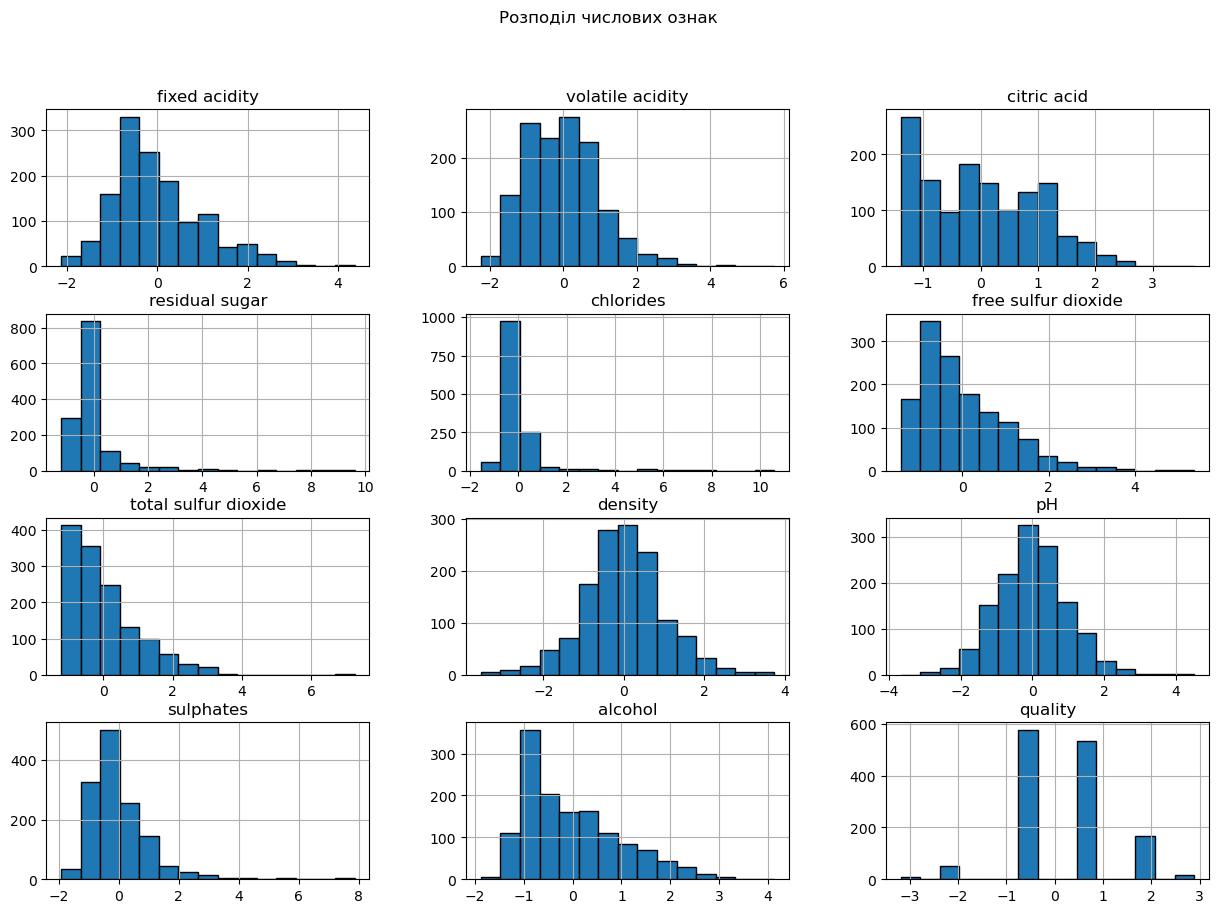

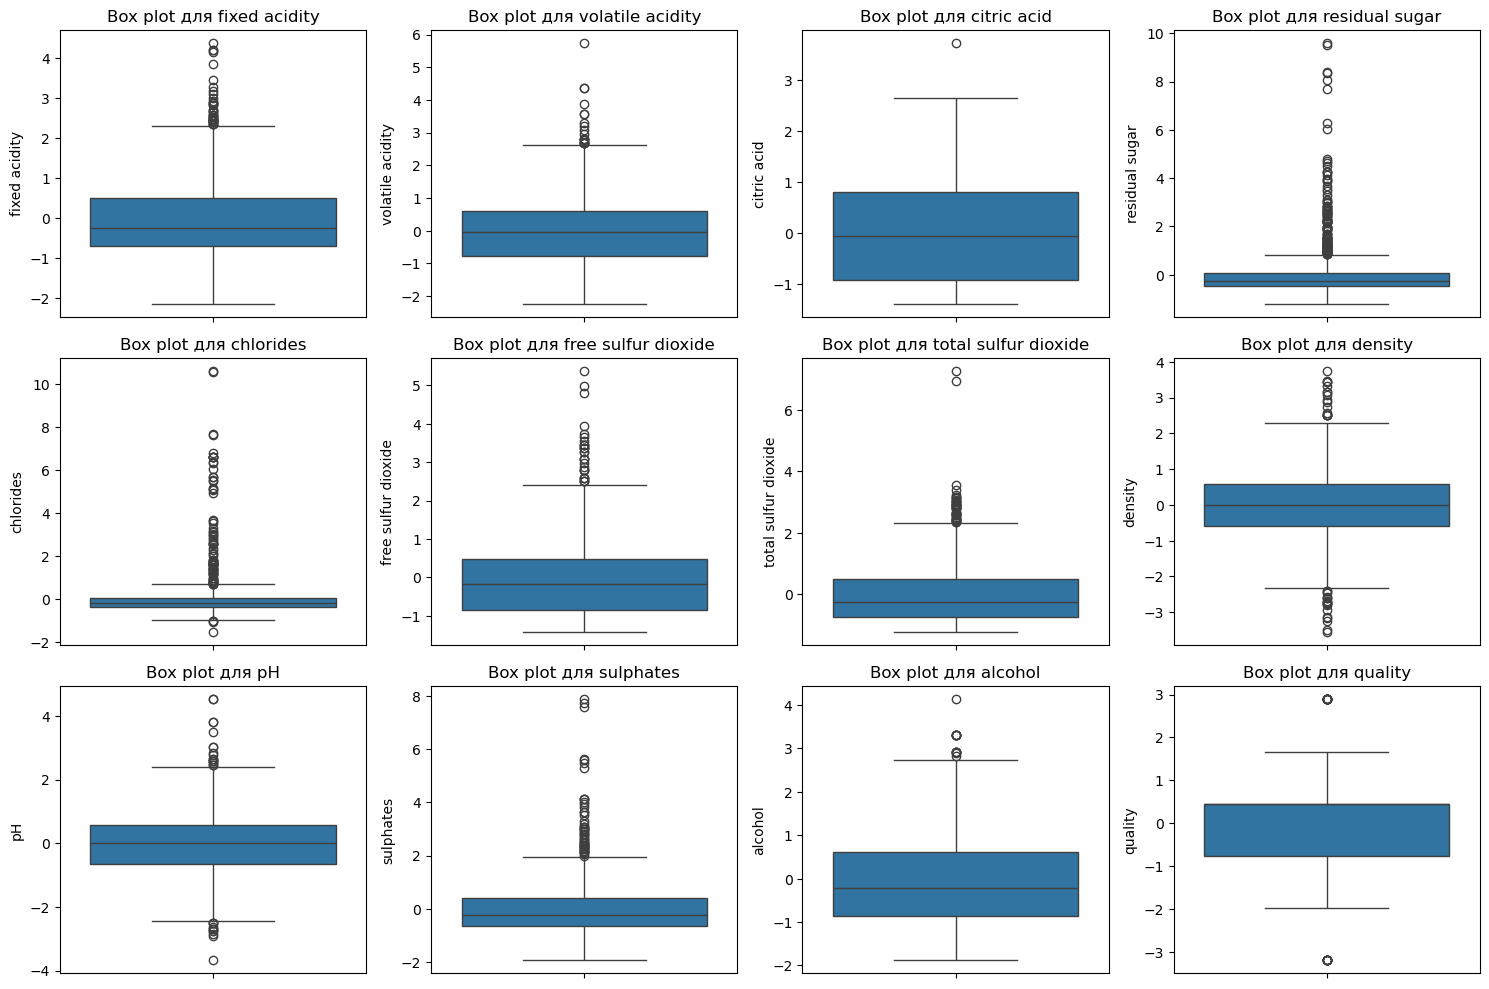

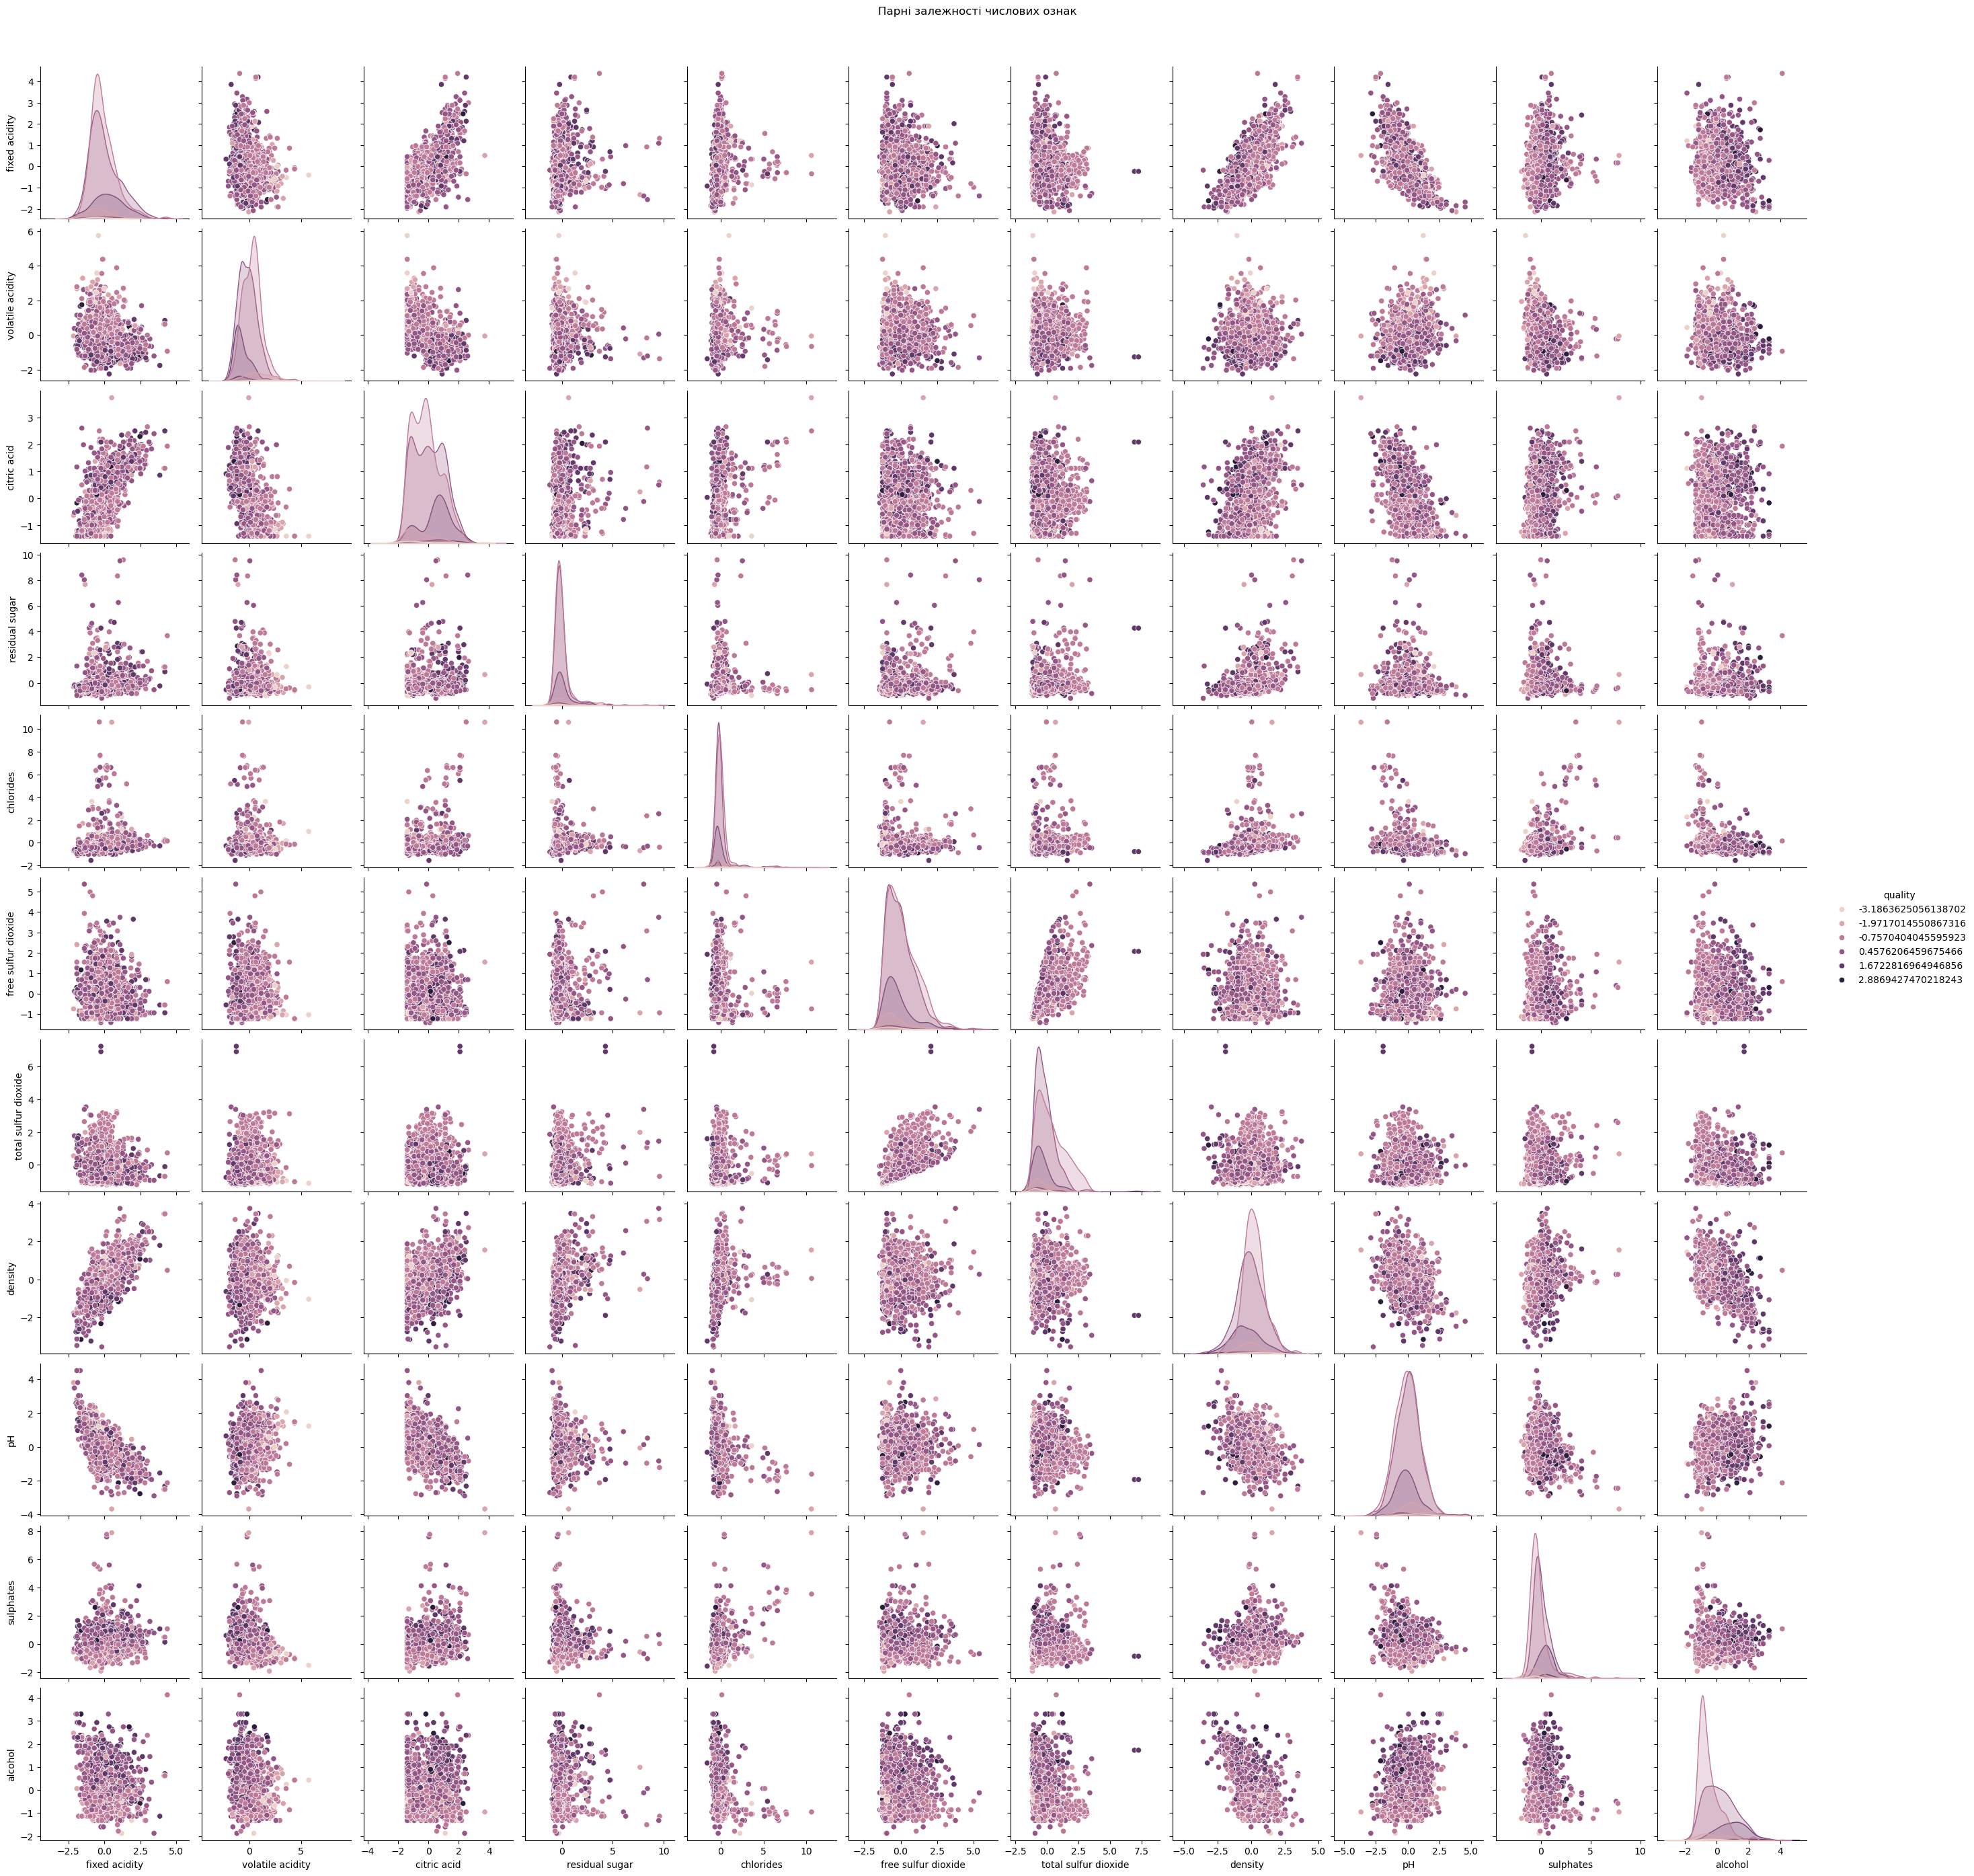

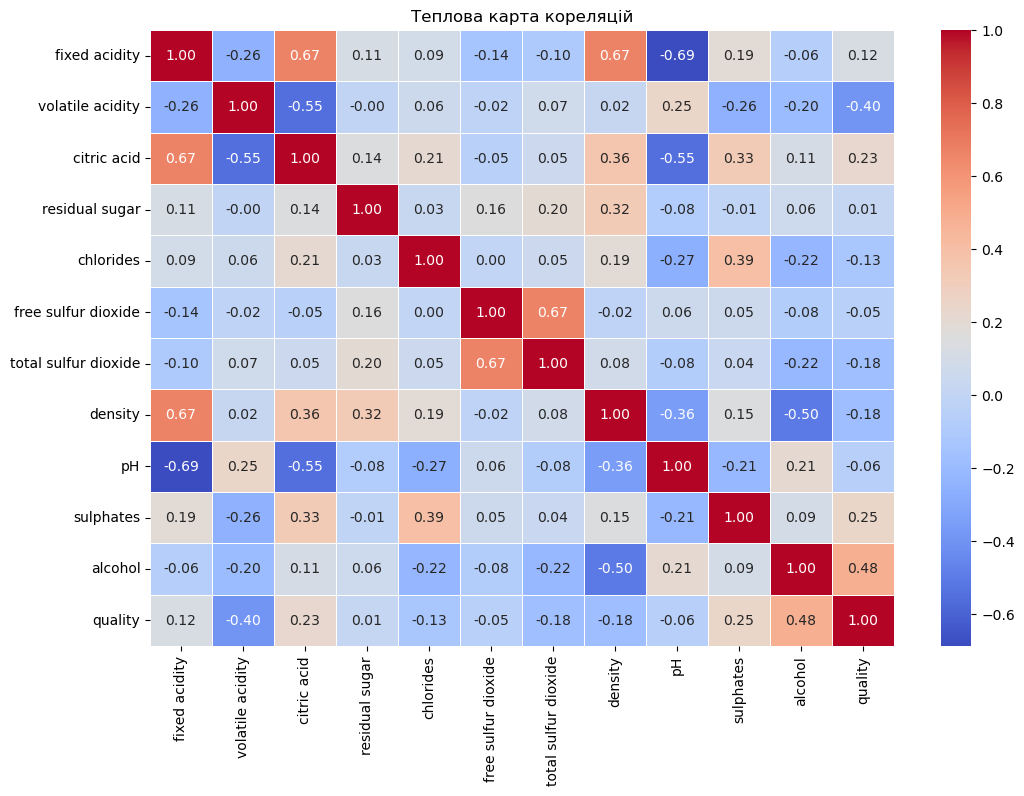

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\Irina\\Documents\\Uni\\Ksu\\Universitat\\3kurs\\2_semestr\\omn\\cleaned_winequality-red.csv"
df_cleaned = pd.read_csv(file_path)

basic_stats = df_cleaned.describe().transpose()
mean = df_cleaned.mean()
median = df_cleaned.median()
mode = df_cleaned.mode().iloc[0]
std_dev = df_cleaned.std()

print("Основні статистики для числових ознак:")
print(basic_stats[['mean', '50%', 'std']])
print("\nМедіана для кожної ознаки:")
print(median)
print("\nМода для кожної ознаки:")
print(mode)

df_cleaned.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Розподіл числових ознак')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box plot для {col}')
plt.tight_layout()
plt.show()

sns.pairplot(df_cleaned, hue="quality", diag_kind="kde", markers='o')
plt.suptitle('Парні залежності числових ознак', y=1.02)
plt.show()

corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій')
plt.show()

## Task 3: Feature Engineering
**Objective:** Create new features to improve the dataset's predictive power.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Create new features based on existing ones (e.g., age groups, interaction terms).
3. Use domain knowledge to generate meaningful features.
4. Analyze the impact of the new features on the dataset's distribution and correlations.
5. Visualize the new features using appropriate plots.

Основні статистики нових ознак:
       alcohol_density  sulphates_alcohol  quality_acidity_interaction
count      1359.000000        1359.000000                  1359.000000
mean         -0.504995           0.091621                     0.119024
std           1.330583           0.956279                     1.052566
min         -10.432123          -7.503323                    -6.036358
25%          -0.758027          -0.169481                    -0.345412
50%          -0.190625           0.104637                     0.076273
75%           0.055655           0.509537                     0.527814
max           6.468824           5.148293                     7.131776


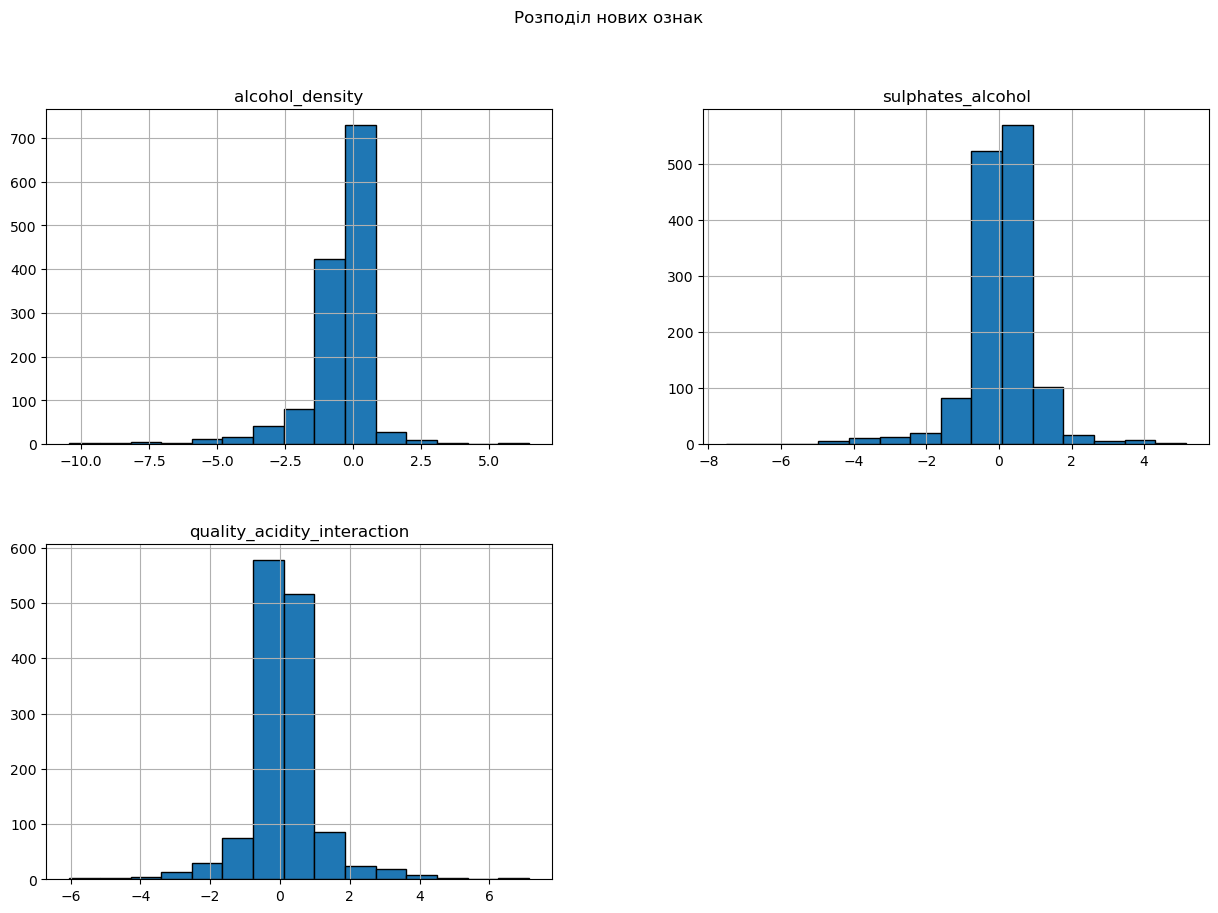

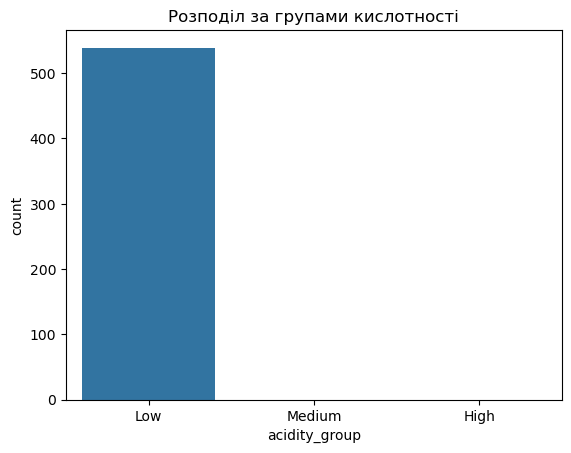

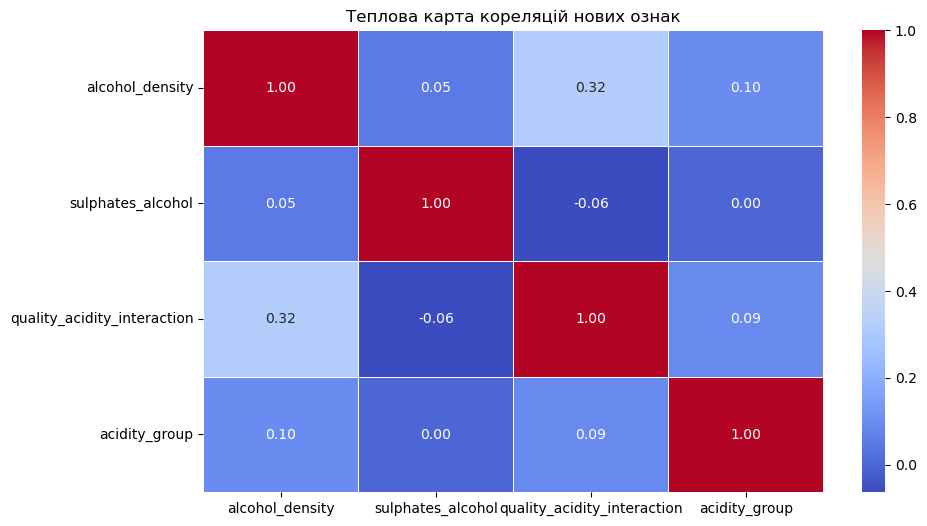

Оновлений датасет збережено за шляхом: C:\Users\Irina\Documents\Uni\Ksu\Universitat\3kurs\2_semestr\omn\updated_winequality-red.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "C:\\Users\\Irina\\Documents\\Uni\\Ksu\\Universitat\\3kurs\\2_semestr\\omn\\cleaned_winequality-red.csv"
df_cleaned = pd.read_csv(file_path)

# Інтеракційні ознаки
df_cleaned['alcohol_density'] = df_cleaned['alcohol'] * df_cleaned['density']
df_cleaned['sulphates_alcohol'] = df_cleaned['sulphates'] * df_cleaned['alcohol']

# Групи за рівнем кислотності
df_cleaned['acidity_group'] = pd.cut(df_cleaned['fixed acidity'], bins=[0, 5, 7, 15], labels=['Low', 'Medium', 'High'])

# Інтеракція між якістю та кислотністю
df_cleaned['quality_acidity_interaction'] = df_cleaned['quality'] * df_cleaned['fixed acidity']

print("Основні статистики нових ознак:")
print(df_cleaned[['alcohol_density', 'sulphates_alcohol', 'quality_acidity_interaction']].describe())

df_cleaned[['alcohol_density', 'sulphates_alcohol', 'quality_acidity_interaction']].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Розподіл нових ознак')
plt.show()

sns.countplot(x='acidity_group', data=df_cleaned)
plt.title('Розподіл за групами кислотності')
plt.show()

corr_matrix_new_features = df_cleaned[['alcohol_density', 'sulphates_alcohol', 'quality_acidity_interaction', 'acidity_group']].copy()
corr_matrix_new_features['acidity_group'] = corr_matrix_new_features['acidity_group'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_new_features.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій нових ознак')
plt.show()

output_file_path = "C:\\Users\\Irina\\Documents\\Uni\\Ksu\\Universitat\\3kurs\\2_semestr\\omn\\updated_winequality-red.csv"
df_cleaned.to_csv(output_file_path, index=False)

print(f"Оновлений датасет збережено за шляхом: {output_file_path}")

## Task 4: Data Visualization
**Objective:** Create insightful visualizations to communicate findings.

**Instructions:**
1. Use the dataset with new features from Task 3.
2. Create a bar chart to compare categorical features.
3. Use a line plot to show trends over time (if applicable).
4. Create a heatmap to visualize correlations between features.
5. Use Seaborn to create a violin plot or swarm plot to compare distributions across categories.
6. Combine multiple plots into a single figure using Matplotlib's subplot functionality.

C:\Users\Irina\AppData\Local\Temp\ipykernel_9820\3555082584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='acidity_group', data=df_cleaned, palette='Set2', ax=axs[0, 0])
C:\Users\Irina\AppData\Local\Temp\ipykernel_9820\3555082584.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='acidity_group', y='alcohol', data=df_cleaned, palette='Set2', ax=axs[1, 1])


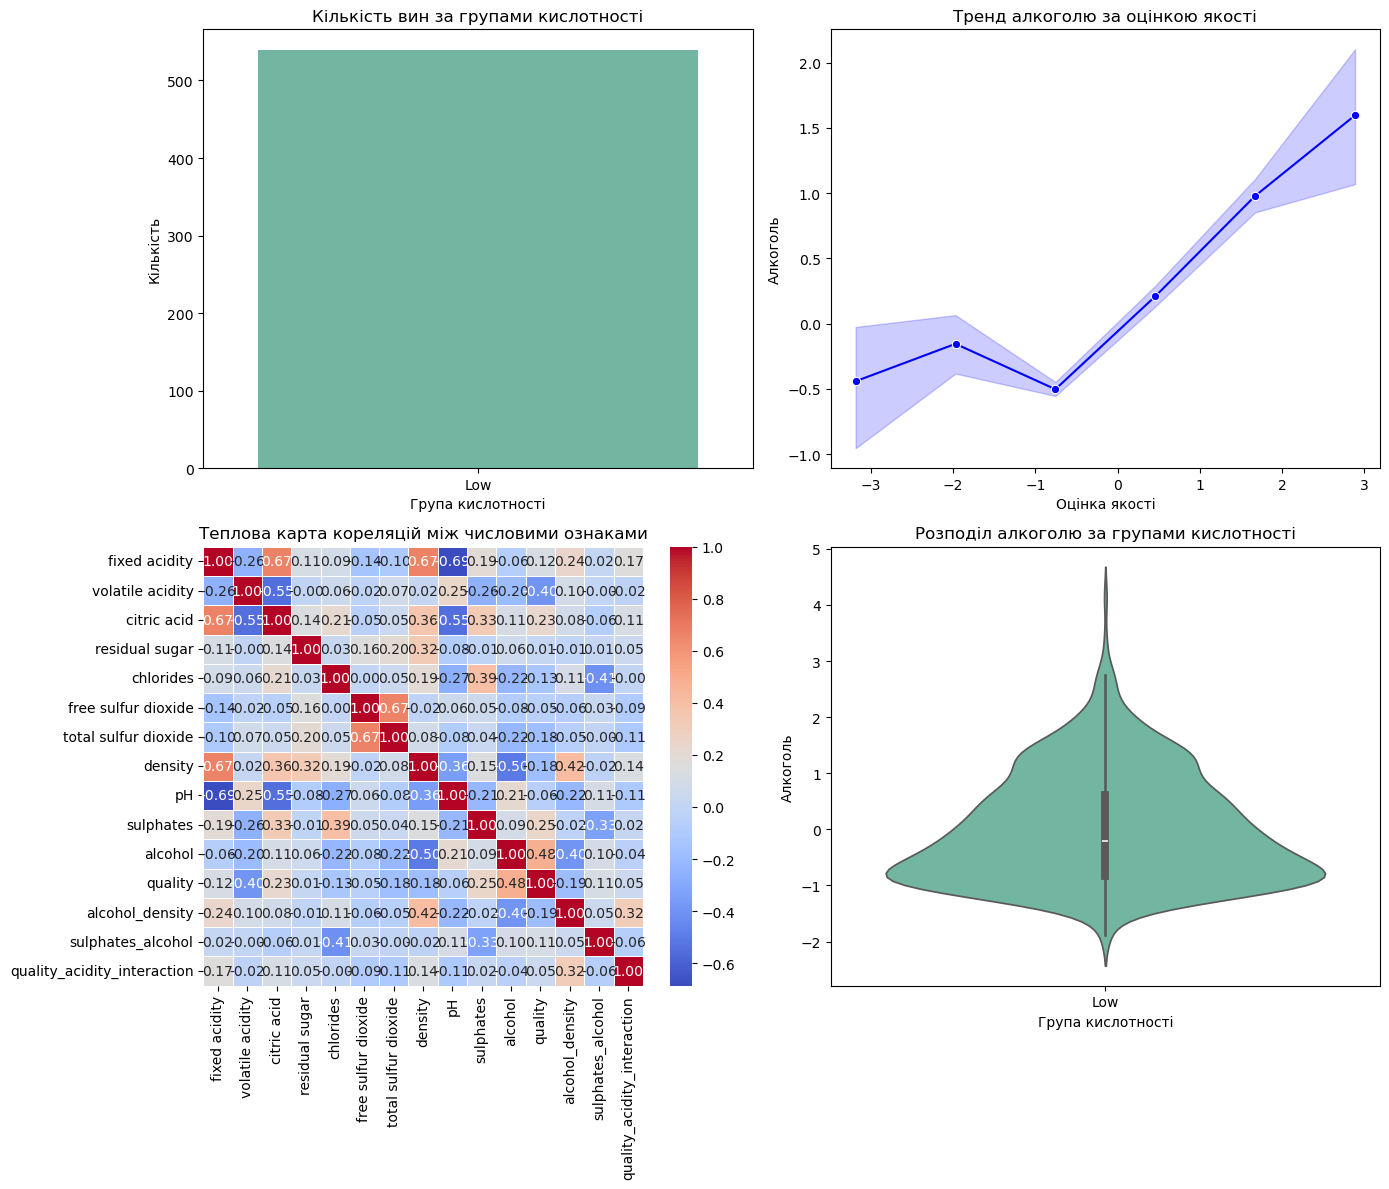

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "C:\\Users\\Irina\\Documents\\Uni\\Ksu\\Universitat\\3kurs\\2_semestr\\omn\\updated_winequality-red.csv"
df_cleaned = pd.read_csv(file_path)

fig, axs = plt.subplots(2, 2, figsize=(14, 12)) 

sns.countplot(x='acidity_group', data=df_cleaned, palette='Set2', ax=axs[0, 0])  
axs[0, 0].set_title('Кількість вин за групами кислотності')
axs[0, 0].set_xlabel('Група кислотності')
axs[0, 0].set_ylabel('Кількість')

sns.lineplot(x='quality', y='alcohol', data=df_cleaned, marker='o', color='b', ax=axs[0, 1])  
axs[0, 1].set_title('Тренд алкоголю за оцінкою якості')
axs[0, 1].set_xlabel('Оцінка якості')
axs[0, 1].set_ylabel('Алкоголь')

corr_matrix = df_cleaned.select_dtypes(include=[float, int]).corr() 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axs[1, 0])  
axs[1, 0].set_title('Теплова карта кореляцій між числовими ознаками')

sns.violinplot(x='acidity_group', y='alcohol', data=df_cleaned, palette='Set2', ax=axs[1, 1])  
axs[1, 1].set_title('Розподіл алкоголю за групами кислотності')
axs[1, 1].set_xlabel('Група кислотності')
axs[1, 1].set_ylabel('Алкоголь')

plt.tight_layout() 
plt.show()
